In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
#from keras.layers.core import Dense, Flatten
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
X_train=np.fromfile('XTrainFigure.dat').reshape((-1,64,64,1))
X_test=np.fromfile('XTestFigure.dat').reshape((-1,64,64,1))
y_train=np.fromfile('yTrainFigure.dat',dtype='int')
y_test=np.fromfile('yTestFigure.dat',dtype='int')

In [3]:
X_train.shape

(3000, 64, 64, 1)

In [4]:
X_train=X_train/255
X_test=X_test/255
X_train.shape

(3000, 64, 64, 1)

In [5]:
y_test.shape

(600,)

In [6]:
X_train_0 = X_train
y_train_0 = y_train
X_test_0 = X_test
y_test_0=y_test
n_test=y_test.shape[0]
y_train

array([3, 1, 2, ..., 3, 1, 4])

In [7]:
y_train=to_categorical(y_train, 6)
y_test =to_categorical(y_test, 6)

In [8]:
y_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [9]:
model = Sequential()
model.add(Conv2D(3, kernel_size = (5, 5), strides = (1, 1), padding = 'same',
                 activation = 'relu', input_shape = (64, 64, 1)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy']) # loss = 'categorical_crossentropy' / mse
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 3)         78        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 197,140
Trainable params: 197,140
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, batch_size = 256, epochs = 20, verbose = 2)

Epoch 1/20
 - 3s - loss: 0.1117 - accuracy: 0.5843
Epoch 2/20
 - 3s - loss: 0.0653 - accuracy: 0.7263
Epoch 3/20
 - 3s - loss: 0.0488 - accuracy: 0.7877
Epoch 4/20
 - 3s - loss: 0.0409 - accuracy: 0.8267
Epoch 5/20
 - 3s - loss: 0.0337 - accuracy: 0.8773
Epoch 6/20
 - 3s - loss: 0.0293 - accuracy: 0.9117
Epoch 7/20
 - 3s - loss: 0.0244 - accuracy: 0.9277
Epoch 8/20
 - 3s - loss: 0.0208 - accuracy: 0.9420
Epoch 9/20
 - 3s - loss: 0.0183 - accuracy: 0.9537
Epoch 10/20
 - 3s - loss: 0.0154 - accuracy: 0.9637
Epoch 11/20
 - 3s - loss: 0.0140 - accuracy: 0.9627
Epoch 12/20
 - 3s - loss: 0.0117 - accuracy: 0.9730
Epoch 13/20
 - 3s - loss: 0.0100 - accuracy: 0.9777
Epoch 14/20
 - 3s - loss: 0.0090 - accuracy: 0.9817
Epoch 15/20
 - 3s - loss: 0.0081 - accuracy: 0.9840
Epoch 16/20
 - 3s - loss: 0.0072 - accuracy: 0.9873
Epoch 17/20
 - 3s - loss: 0.0063 - accuracy: 0.9893
Epoch 18/20
 - 3s - loss: 0.0059 - accuracy: 0.9897
Epoch 19/20
 - 3s - loss: 0.0055 - accuracy: 0.9920
Epoch 20/20
 - 3s - l

In [11]:
print("Тестирование:")
score = model.evaluate(X_test, y_test, verbose = 0)
print("точность тестирования: ",score[1])

Тестирование:
точность тестирования:  0.9449999928474426


In [12]:
y_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [13]:
print("Прогноз")
classes = model.predict_classes(X_test) # , batch_size = 10
# np.sum(classes == test_labels_0) вернет сумму случаев, когда classes[i] = test_labels_0[i]
acc = np.sum(classes == y_test_0) / n_test * 100
print("Точность прогнозирования: " + str(acc) + '%')

Прогноз
Точность прогнозирования: 94.5%


In [14]:
def PrintRandomFigure(X,y):
    fig, ax = plt.subplots(6,10,sharex=True,sharey=True,figsize=(30,30))
    
    for i in range(6):
        n=0
        k=0
        while(n<10):
            if y[k]==i:
                ax[i,n].imshow(X[k],cmap='Greys',interpolation='None', origin='lower')
                ax[i,n].axis('on')
                n+=1
            k+=1

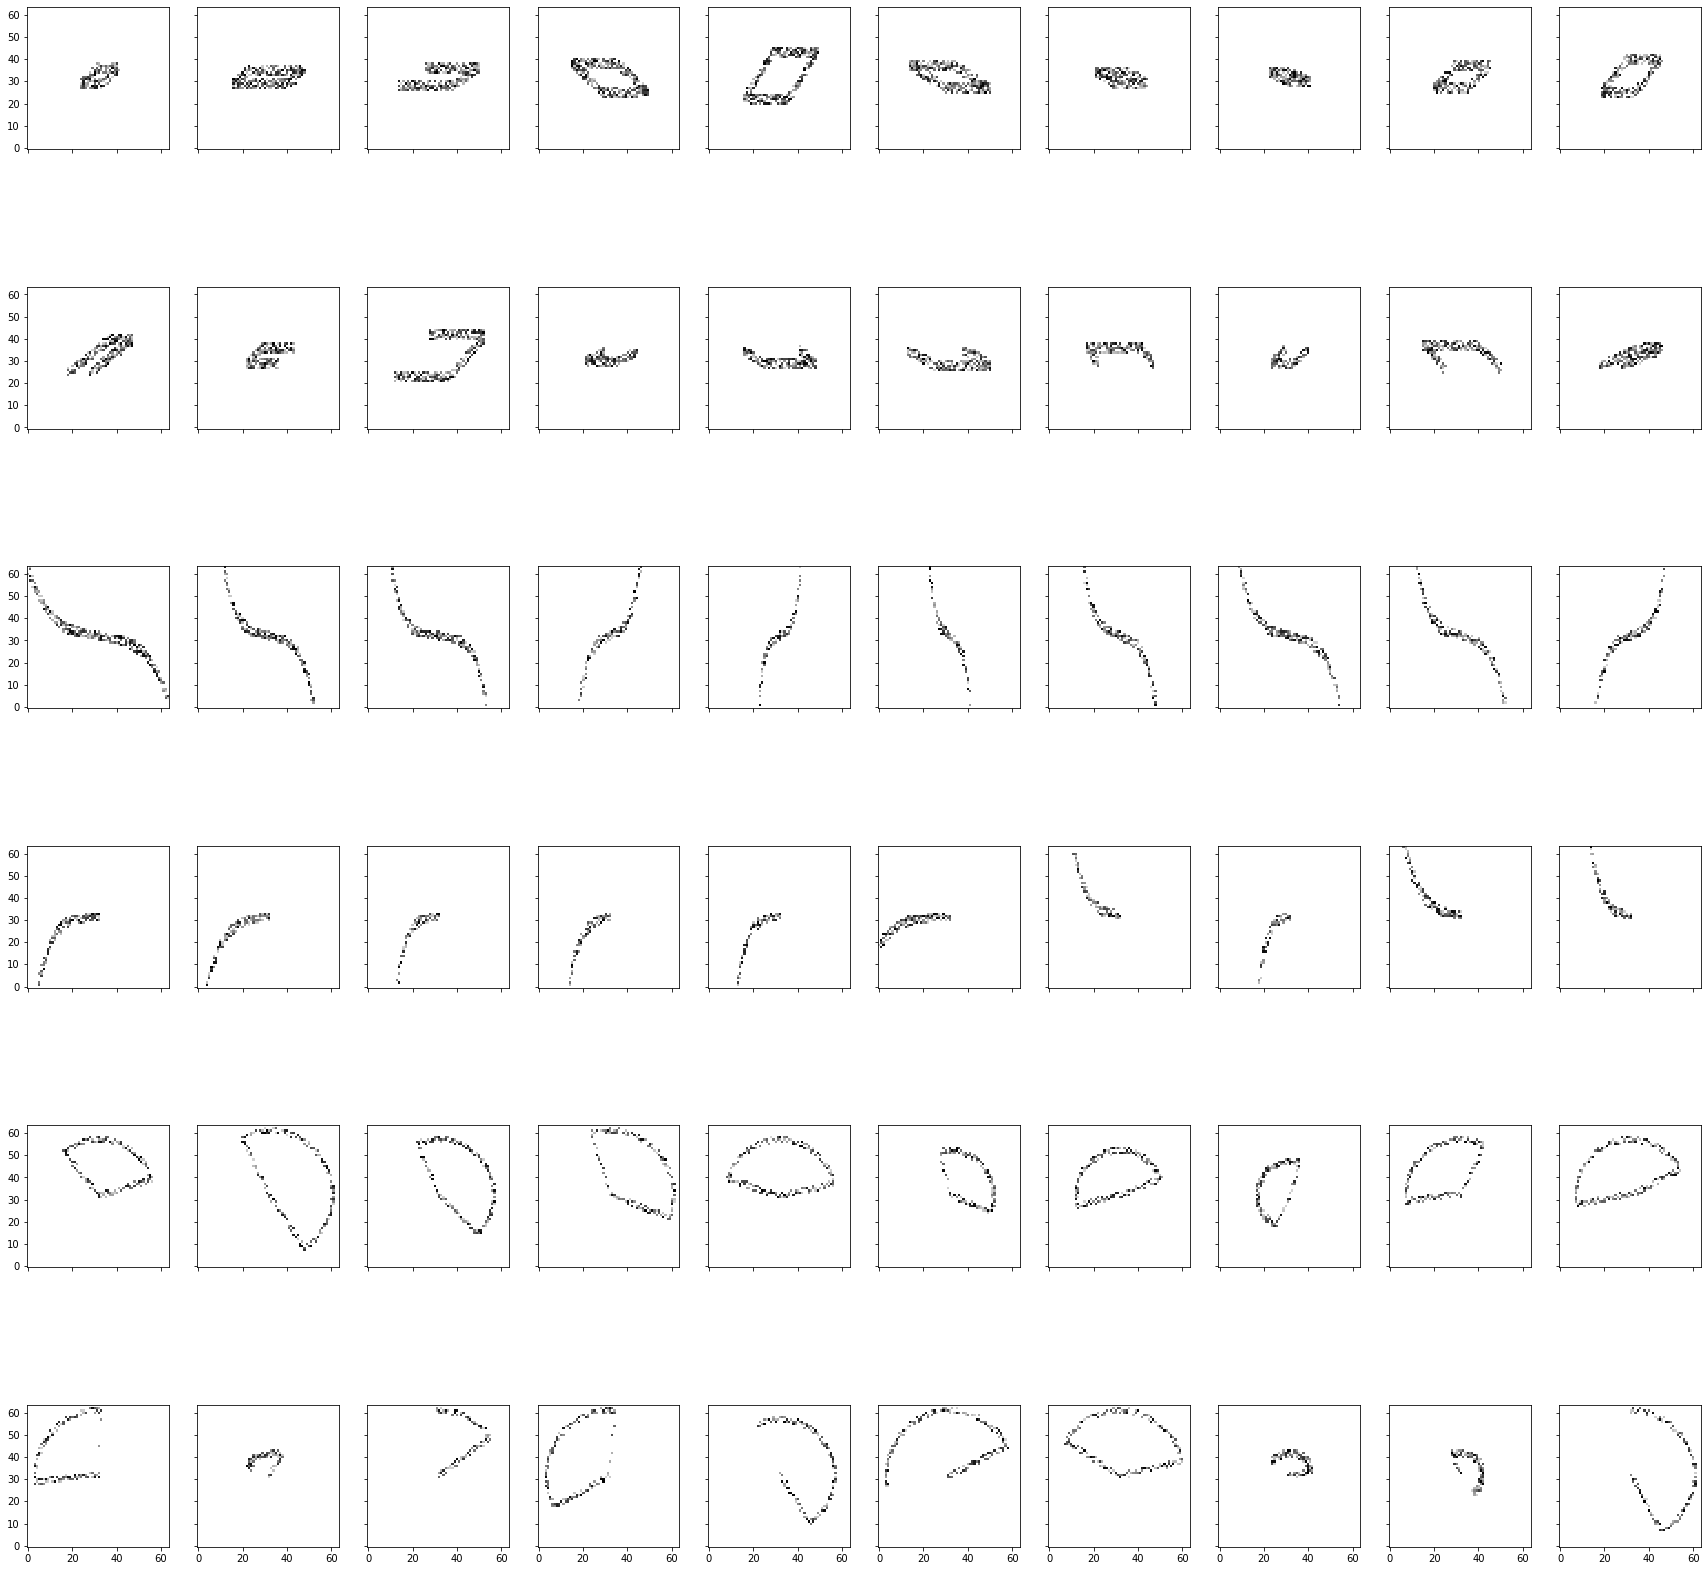

In [15]:
X_test1=X_test.reshape((-1,64,64))
y_test1=np.fromfile('yTestFigure.dat',dtype='int')
PrintRandomFigure(X_test1,classes)